In [25]:
# 🧱 **ÉTAPE 0 — Préparation du projet**
#
# ➤ Initialiser l’environnement virtuel et installer les bibliothèques nécessaires :
#
# ```bash
# python3 -m venv .venv
# source .venv/bin/activate
# pip install pandas matplotlib seaborn jupyter
# ```
# ➤ Optionnel : configurer Git pour le suivi de version.


In [26]:
# 📥 **ÉTAPE 1 — Chargement des données**
#
# ➤ Charger le fichier CSV `data/metadata/infos_especes.csv` avec le bon encodage (`UTF-8` ou `latin1`).


In [27]:
import pandas as pd

# Lecture du fichier CSV
df = pd.read_csv("../data/metadata/infos_especes.csv", encoding="UTF-8", sep=";")

# Aperçu rapide
df.head()


,Espèce,Description,Nom latin,Famille,Taille,Région,Habitat,Fun fact
0,Castor,"Le castor d’Europe, appelé également le castor...",Castor canadensis,Mammifère,100 à 135 cm queue comprise,Europe du nord et Eurasie,"Le castor d’Europe vit le long des rivières, d...","À l’exception des humains, le castor est l’un ..."
1,Chat,Le Chat sauvage4 (Felis silvestris) est une es...,Felis silvestris,Mammifère,46 à 51 cm sans la queue,"Amérique, Europe, Asie occidentale et Afrique",NaN,Un chat ne peut pas voir directement sous son ...
2,Chien,Alors qu'on estimait autrefois que le Chien co...,Canis lupus familiaris,Mammifère,NaN,Hémisphère nord,NaN,L'empreinte de la truffe d'un chien est aussi ...
3,Coyote,"Le coyote, également appelé le chacal américai...",Canis latrans,Mammifère,70 à 120 cm,"Amérique du nord, Amérique centrale","Le coyote vit dans les plaines, les prairies, ...","Animal social et parfois solitaire, le coyote ..."
4,Ecureuil,L’écureuil est un rongeur arboricole appartena...,Sciurus vulgaris,Mammifère,20 à 25 cm,"Eurasie (Europe, Asie Centrale)","Animal arboricole par excellence, l’écureuil r...",L'écureuil est l’un des rares mammifères à pou...


In [28]:
# 🔧 **ÉTAPE 2 — Nettoyage des colonnes**
#
# ➤ Objectif : uniformiser les noms de colonnes (minuscules, sans accents, sans espaces).


In [29]:
import unidecode

# Nettoyage des noms de colonnes
df.columns = [unidecode.unidecode(col).strip().lower().replace(" ", "_") for col in df.columns]
df.columns


Index(['espece', 'description', 'nom_latin', 'famille', 'taille', 'region',
       'habitat', 'fun_fact'],
      dtype='object')

In [30]:
# 🧹 **ÉTAPE 3 — Nettoyage des données**
#
# ➤ Objectif : supprimer les doublons, les lignes vides, afficher les valeurs manquantes.


In [31]:
# Supprimer les caractères invisibles comme les \xa0 (espaces insécables)
df = df.map(lambda x: x.replace('\xa0', ' ') if isinstance(x, str) else x)

# Supprimer les lignes entièrement vides
df.dropna(how="all", inplace=True)

# Supprimer les doublons
df.drop_duplicates(inplace=True)

# Afficher les valeurs manquantes
print("✔️ Valeurs manquantes par colonne :")
print(df.isna().sum())


✔️ Valeurs manquantes par colonne :
espece         0
description    0
nom_latin      0
famille        0
taille         1
region         0
habitat        3
fun_fact       0
dtype: int64


In [32]:
# 📊 **ÉTAPE 4 — Transformation & Visualisation simple**
#
# ➤ Objectif :
# - Extraire la moyenne de la colonne `taille` (qui contient des fourchettes "20-40")
# - Créer un histogramme des tailles moyennes par espèce


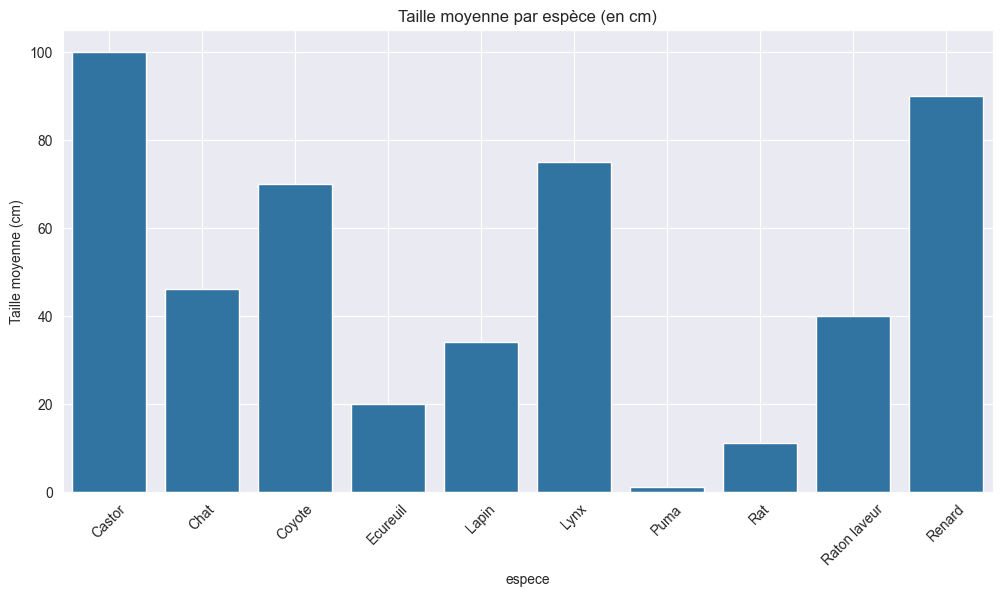

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire la taille moyenne à partir des fourchettes
def extract_avg_size(value):
    try:
        if pd.isna(value):
            return None
        # Nettoyage
        cleaned = str(value).replace('\xa0', '').replace(' ', '').replace('–', '-').replace('à', '-')
        # Séparation
        parts = cleaned.split('-')
        if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
            return (int(parts[0]) + int(parts[1])) / 2
        elif parts[0].isdigit():
            return int(parts[0])
    except:
        return None

df["taille_moyenne_cm"] = df["taille"].apply(extract_avg_size)
df = df[df["taille_moyenne_cm"].notna()]

# Affichage du graphique
plt.figure(figsize=(12, 6))
sns.barplot(x="espece", y="taille_moyenne_cm", data=df)
plt.title("Taille moyenne par espèce (en cm)")
plt.ylabel("Taille moyenne (cm)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [34]:
df[["taille", "taille_moyenne_cm"]].head(10)

,taille,taille_moyenne_cm
0,100 à 135 cm queue comprise,100.0
1,46 à 51 cm sans la queue,46.0
3,70 à 120 cm,70.0
4,20 à 25 cm,20.0
5,34 à 50 cm,34.0
7,75 à 135 cm,75.0
9,"1 à 2,30 m",1.0
10,11 à 28cm sans la queue,11.0
11,40 à 80 cm,40.0
12,90 à 120 cm,90.0


In [35]:
# 📈 **ÉTAPE 5 — Détection des valeurs aberrantes**
#
# ➤ Objectif : identifier visuellement les extrêmes.


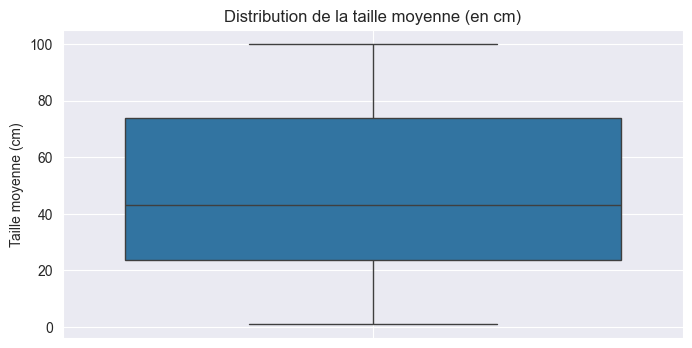

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y="taille_moyenne_cm")
plt.title("Distribution de la taille moyenne (en cm)")
plt.ylabel("Taille moyenne (cm)")
plt.grid(True)
plt.show()


In [37]:
# 📁 **ÉTAPE 6 — Indexation des fichiers d’empreintes**
#
# ➤ Objectif : lister tous les fichiers d’empreintes dans le dossier `data/raw` et les organiser pour traitement.


In [38]:
from pathlib import Path

# Base path relatif au notebook
base_path = Path("../data/raw/Mammifères")
extensions = {".jpg", ".jpeg", ".png"}

# Indexation des fichiers avec nettoyage
file_index = [
    str(path.resolve())  # .resolve() pour chemin absolu propre
    for path in base_path.rglob("*")
    if path.suffix.lower() in extensions and not path.name.startswith("._")
]

print(f"{len(file_index)} fichiers indexés.")

# Création du DataFrame avec espèce extraite
df_index = pd.DataFrame({"fichier": file_index})
df_index["espece"] = df_index["fichier"].apply(lambda x: Path(x).parent.name)

# Aperçu
df_index.head(10)

252 fichiers indexés.


,fichier,espece
0,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
1,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
2,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
3,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
4,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
5,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
6,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
7,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
8,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil
9,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,Ecureuil


# 📁 ÉTAPE 7 — Fusion fichiers & métadonnées

## Objectif :
	•	Associer chaque fichier à ses métadonnées (taille moyenne, famille, etc.)
	•	Créer un DataFrame final prêt pour l’analyse ou l’entraînement d’un modèle IA.

In [39]:
# Fusion avec le DataFrame de métadonnées
# Harmoniser les noms pour la jointure
df_index["espece"] = df_index["espece"].str.lower()
df["espece"] = df["espece"].str.lower()

# Fusion sur le nom de l'espèce
df_final = df_index.merge(df, on="espece", how="left")

print("✅ Fusion terminée :")
print(df_final.head(10))

print(f"\nNombre total de fichiers annotés : {len(df_final)}")
print(f"Nombre d'espèces uniques : {df_final['espece'].nunique()}")
print(df_final["espece"].value_counts())

✅ Fusion terminée :
                                             fichier    espece  \
0  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
1  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
2  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
3  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
4  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
5  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
6  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
7  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
8  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   
9  /Users/louisgardet/dev/python/ETL_Wildlens/dat...  ecureuil   

                                         description         nom_latin  \
0  L’écureuil est un rongeur arboricole appartena...  Sciurus vulgaris   
1  L’écureuil est un rongeur arboricole appartena...  Sciurus vulgaris   
2  L’écureuil est un rongeur ar

# 📦 Étape 8 — Sauvegarde finale du dataset

In [40]:
# Sauvegarde finale du dataset indexé

# On ajoute la taille moyenne si tu veux la réutiliser
df_index = df_index.merge(
    df[['espece', 'taille_moyenne_cm']],
    on='espece',
    how='left'
)

# On nettoie les colonnes pour le ML
df_index['espece'] = df_index['espece'].str.lower().str.replace(" ", "_")

# Sauvegarde dans data/processed/
output_path = "../data/processed/dataset_index.csv"
df_index.to_csv(output_path, index=False, sep=";")

print(f"✔️ Dataset final sauvegardé : {output_path}")
print(f"{len(df_index)} fichiers indexés")
df_index.head()

✔️ Dataset final sauvegardé : ../data/processed/dataset_index.csv
252 fichiers indexés


,fichier,espece,taille_moyenne_cm
0,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,ecureuil,20.0
1,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,ecureuil,20.0
2,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,ecureuil,20.0
3,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,ecureuil,20.0
4,/Users/louisgardet/dev/python/ETL_Wildlens/dat...,ecureuil,20.0


Remarque : le dataset met du temps avant d'être créé. Vérifier qu'il n'y a pas de duplication si je clique plusieurs fois

# 📥 ÉTAPE 9 — Ingestion du dataset OpenAnimalTracks
Objectif :
- Indexer les images de data/raw/OpenAnimalTracks
- Créer un dataset_index_openanimaltracks.csv
- Préparer ce dataset pour un pipeline séparé

In [41]:
import pandas as pd
from pathlib import Path

# 1️⃣ Définir le chemin du dataset
openanimal_path = Path("../data/raw/OpenAnimalTracks")

# 2️⃣ Parcourir toutes les espèces
entries = []
for species_dir in openanimal_path.iterdir():
    if species_dir.is_dir():
        species = species_dir.name  # Garde les noms anglais pour l'instant
        for img_path in species_dir.glob("*.*"):
            if img_path.suffix.lower() in [".jpg", ".jpeg", ".png"]:
                entries.append([str(img_path), species])

# 3️⃣ Créer un DataFrame
df_openanimal = pd.DataFrame(entries, columns=["fichier", "espece"])
print(f"📊 {len(df_openanimal)} images trouvées pour OpenAnimalTracks")
print(df_openanimal['espece'].value_counts())

# 4️⃣ Sauvegarder l’index
csv_openanimal = "../data/metadata/dataset_index_openanimaltracks.csv"
df_openanimal.to_csv(csv_openanimal, sep=";", index=False)
print(f"✅ CSV sauvegardé : {csv_openanimal}")

📊 2469 images trouvées pour OpenAnimalTracks
espece
western_grey_squirrel         261
raccoon                       247
blackbear                     236
mule_deer                     214
bobcat                        172
wild_turkey                   134
gray_fox                      134
coyote                        132
skunk                         132
american_mink                 131
canada_goose                  120
mountainlion                  106
north_american_river_otter    105
rat                            91
mouse                          88
beaver                         77
horse                          56
elephant                       33
Name: count, dtype: int64
✅ CSV sauvegardé : ../data/metadata/dataset_index_openanimaltracks.csv


📋 ÉTAPE 10 — Vérification de l’index des images

Objectifs :
	•	Vérifier que tous les chemins d’images existent
	•	Détecter les doublons éventuels
	•	Vérifier la répartition des classes

In [47]:
import pandas as pd
from pathlib import Path

# 1️⃣ Charger le CSV en ignorant la première ligne d'en-tête
csv_path = "../data/metadata/dataset_index_openanimaltracks.csv"
df = pd.read_csv(csv_path, sep=';', header=0, names=['filepath', 'species'])

print(f"✅ CSV chargé avec {len(df)} lignes")

# 2️⃣ Nettoyer les lignes vides ou incorrectes
df = df.dropna(subset=['filepath'])
df = df[df['filepath'] != 'fichier']  # Supprime la ligne qui contient "fichier" si elle reste

# 3️⃣ Vérification des doublons
duplicates = df.duplicated(subset='filepath').sum()
print("✅ Aucun doublon détecté" if duplicates == 0 else f"⚠️ {duplicates} doublons détectés")

# 4️⃣ Vérification de l'existence des fichiers
missing_files = [f for f in df['filepath'] if not Path(f).exists()]
print("✅ Tous les fichiers existent" if not missing_files else f"⚠️ {len(missing_files)} fichiers manquants")

# 5️⃣ Statistiques par classe
class_counts = df['species'].value_counts()
print("\n📊 Répartition des images par espèce :")
print(class_counts)

# 6️⃣ Chemins uniques
unique_paths = df['filepath'].nunique()
print(f"\n🔹 Chemins uniques : {unique_paths}/{len(df)}")

✅ CSV chargé avec 2469 lignes
✅ Aucun doublon détecté
✅ Tous les fichiers existent

📊 Répartition des images par espèce :
species
western_grey_squirrel         261
raccoon                       247
blackbear                     236
mule_deer                     214
bobcat                        172
wild_turkey                   134
gray_fox                      134
coyote                        132
skunk                         132
american_mink                 131
canada_goose                  120
mountainlion                  106
north_american_river_otter    105
rat                            91
mouse                          88
beaver                         77
horse                          56
elephant                       33
Name: count, dtype: int64

🔹 Chemins uniques : 2469/2469


📊 ÉTAPE 11 — Visualisation de la répartition

Objectifs :
	•	Afficher un barplot pour détecter les déséquilibres
	•	Identifier les classes sur- ou sous-représentées

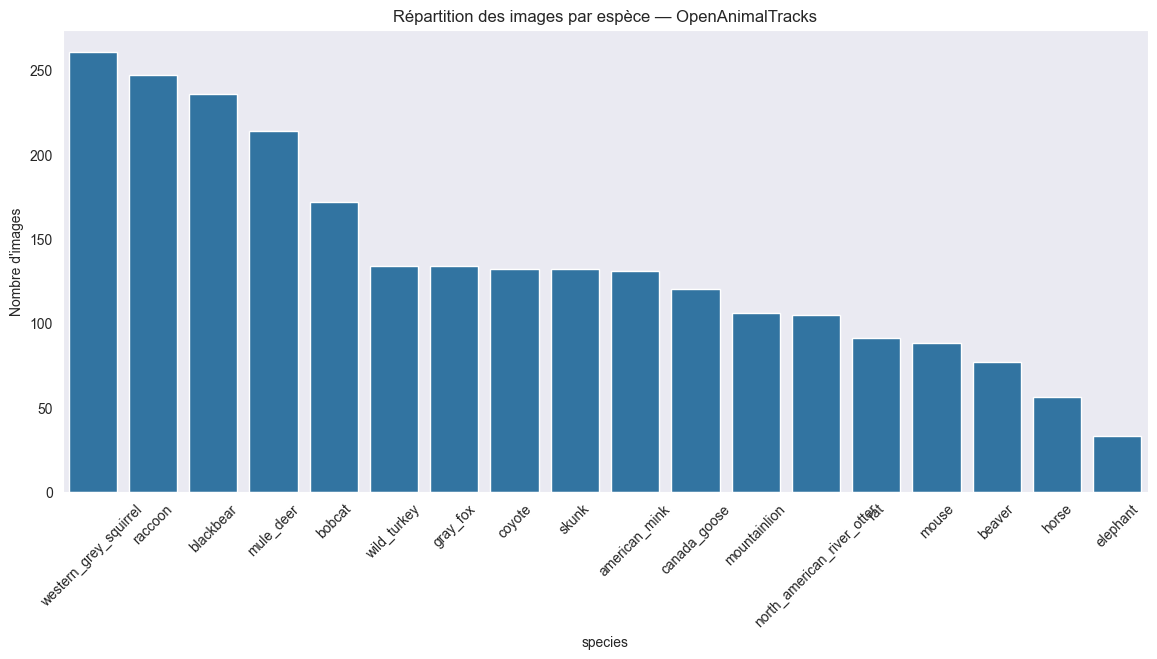

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=45)
plt.title("Répartition des images par espèce — OpenAnimalTracks")
plt.ylabel("Nombre d'images")
plt.grid(axis="y")
plt.show()

📦 Étape 12 — Harmonisation des classes FR/EN

Objectifs :
	1.	Créer un dictionnaire de mapping anglais → français.
	2.	Générer un CSV harmonisé qui sera utilisable pour un entraînement global plus tard.
	3.	Vérifier la répartition finale pour t’assurer qu’il n’y a pas d’espèces orphelines.

✅ Toutes les espèces ont été mappées en français.
✔️ CSV harmonisé sauvegardé : ../data/metadata/dataset_index_openanimaltracks_FR.csv


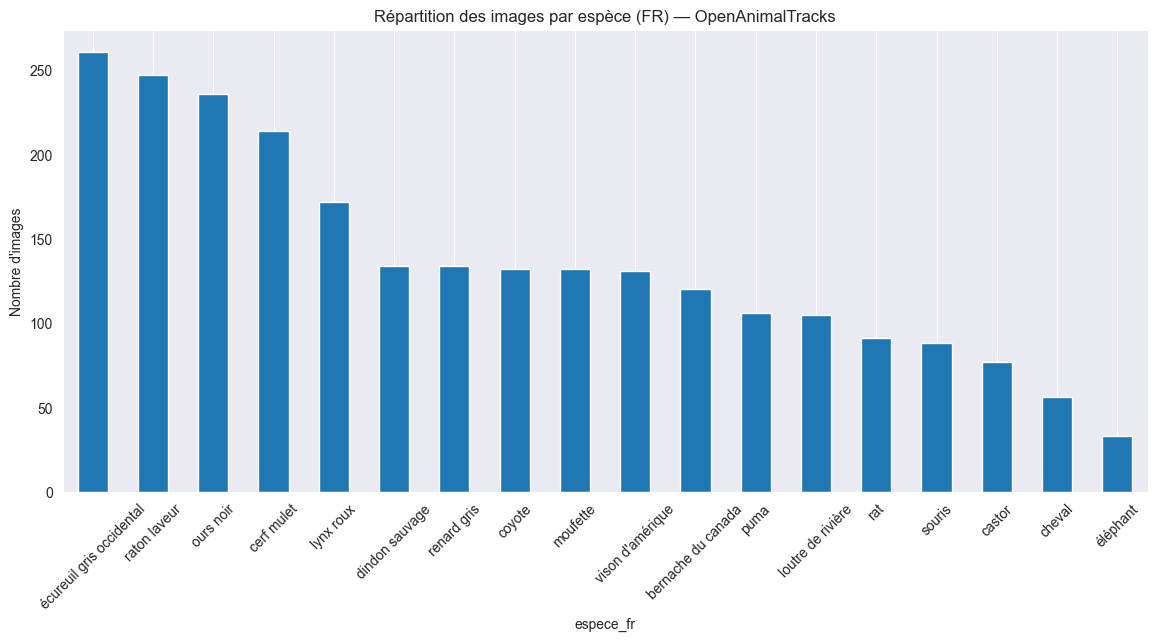

In [49]:
# 🗂️ ÉTAPE 12 — Harmonisation des classes OpenAnimalTracks vers FR


import pandas as pd

# 1️⃣ Charger le CSV OpenAnimalTracks
csv_openanimal = "../data/metadata/dataset_index_openanimaltracks.csv"
df_open = pd.read_csv(csv_openanimal, sep=';', names=['filepath', 'species'], header=0)

# 2️⃣ Dictionnaire de mapping EN → FR
mapping_en_fr = {
    "american_mink": "vison d'amérique",
    "beaver": "castor",
    "blackbear": "ours noir",
    "bobcat": "lynx roux",
    "canada_goose": "bernache du canada",
    "coyote": "coyote",
    "elephant": "éléphant",
    "gray_fox": "renard gris",
    "horse": "cheval",
    "mountainlion": "puma",
    "mouse": "souris",
    "mule_deer": "cerf mulet",
    "north_american_river_otter": "loutre de rivière",
    "raccoon": "raton laveur",
    "rat": "rat",
    "skunk": "moufette",
    "western_grey_squirrel": "écureuil gris occidental",
    "wild_turkey": "dindon sauvage"
}

# 3️⃣ Appliquer le mapping
df_open['espece_fr'] = df_open['species'].map(mapping_en_fr)

# 4️⃣ Vérification des lignes non mappées
non_mapped = df_open[df_open['espece_fr'].isna()]
if len(non_mapped) > 0:
    print(f"⚠️ {len(non_mapped)} lignes n'ont pas de correspondance FR")
    print(non_mapped.head())
else:
    print("✅ Toutes les espèces ont été mappées en français.")

# 5️⃣ Sauvegarde d'un CSV harmonisé
csv_harmonized = "../data/metadata/dataset_index_openanimaltracks_FR.csv"
df_open[['filepath', 'espece_fr']].to_csv(csv_harmonized, sep=';', index=False)
print(f"✔️ CSV harmonisé sauvegardé : {csv_harmonized}")

# 6️⃣ Visualisation de la répartition finale en FR
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
df_open['espece_fr'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Répartition des images par espèce (FR) — OpenAnimalTracks")
plt.ylabel("Nombre d'images")
plt.grid(axis="y")
plt.show()

📦 Étape 13 — Préparation pour le ML (Train / Val / Test)

Objectifs :
	1.	Charger le CSV harmonisé.
	2.	Créer des splits train / validation / test (ex : 70/20/10).
	3.	Sauvegarder une structure de dossiers compatible TensorFlow / PyTorch :

In [50]:
import pandas as pd
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split

# 📁 Chemins
CSV_PATH = Path("../data/metadata/dataset_index_openanimaltracks_FR.csv")
OUTPUT_DIR = Path("../data/processed/OpenAnimalTracks_split")

# 📊 Ratios
TRAIN_RATIO = 0.7
VAL_RATIO = 0.2
TEST_RATIO = 0.1

def prepare_dataset_splits():
    # ✅ Chargement du dataset
    df = pd.read_csv(CSV_PATH, sep=';')
    print(f"✅ Dataset chargé avec {len(df)} images harmonisées")

    # 🎯 Split par classe
    splits = []
    for espece, group in df.groupby("espece_fr"):
        train, temp = train_test_split(group, train_size=TRAIN_RATIO, random_state=42)
        val, test = train_test_split(temp, test_size=TEST_RATIO / (VAL_RATIO + TEST_RATIO), random_state=42)

        train['split'] = 'train'
        val['split'] = 'val'
        test['split'] = 'test'

        splits.append(pd.concat([train, val, test]))

    df_split = pd.concat(splits)
    print("\n📊 Répartition finale :")
    print(df_split['split'].value_counts())

    return df_split

def create_output_structure(output_dir, species_list):
    for split in ['train', 'val', 'test']:
        for species in species_list:
            dir_path = output_dir / split / species
            dir_path.mkdir(parents=True, exist_ok=True)

def copy_images(df_split, output_dir):
    for _, row in df_split.iterrows():
        src = Path(row['filepath'])
        dst = output_dir / row['split'] / row['espece_fr'] / src.name

        if not dst.exists():
            shutil.copy(src, dst)

def main():
    df_split = prepare_dataset_splits()
    species_list = df_split['espece_fr'].unique()

    create_output_structure(OUTPUT_DIR, species_list)
    copy_images(df_split, OUTPUT_DIR)

    print("\n✅ Dataset ML prêt dans :", OUTPUT_DIR)

if __name__ == "__main__":
    main()

✅ Dataset chargé avec 2469 images harmonisées
📊 Répartition finale :
split
train    1719
val       493
test      257
Name: count, dtype: int64
✅ Dataset ML prêt dans : ../data/processed/OpenAnimalTracks_split
